In [530]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from enum import Enum
from sklearn.preprocessing import normalize
from scipy import stats
from sklearn.metrics import accuracy_score
data_df=pd.read_csv("teamsheet.csv")
datapoints=data_df.values[:,1:]
data_df

,Team,winsInSeason2016,winsInSeason2017
0,X1,3,5
1,X2,3,4
2,X3,2,8
3,X4,2,3
4,X5,6,2
5,X6,6,4
6,X7,7,3
7,X8,7,4
8,X9,8,5
9,X10,7,6


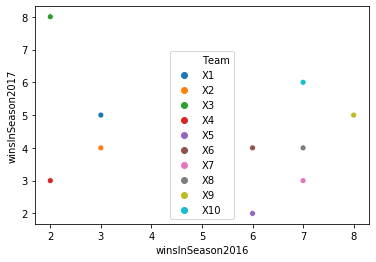

In [531]:
plot=sns.scatterplot(x='winsInSeason2016',y='winsInSeason2017',hue="Team",data=data_df)

In [532]:
    
    
def cosine(datapoints, c):
    return 1-normalize(datapoints.reshape(-1, datapoints.shape[1]), axis=1).dot(normalize(c.reshape(-1, 1), axis=0))

def jaccard(datapoints, c):
    return (1-np.sum(np.minimum(datapoints,c),axis=1)/np.sum(np.maximum(datapoints,c),axis=1)).reshape(-1,1)

def sse(datapoints, clusters, centroids, metric=eculidean):
    result = 0
    for i, centroid in enumerate(centroids):
        result += np.sum(metric(datapoints[np.where(clusters==i)], centroid))
    
    return result

def manhattan(datapoints, c):
    return np.sum(np.abs(datapoints-c), axis=1).reshape(-1, 1)

def eculidean(datapoints,c):
    return np.sum((datapoints-c)**2, axis=1).reshape(-1,1)

    

In [533]:
def kmeans(centroids, datapoints,k=3, tol=1e-9, Maxteration=100, metric=3):
  
    np.random.seed(42)
    
    if centroids is None:
        centroids =datapoints[np.random.choice(len(datapoints),size=k,replace=False)]
    
    
    centroids = np.asarray(centroids)
    
    
    
    i=0
    
    metrics = {
        
       0: euclidean,
        1: cosine,
        2: jaccard,
        3: manhattan
        
        
    }

    prevsse=None
    currsse=None
    old_clust=None
    
    while i<Maxteration:
        dist=[]
        for c in centroids:
            dist.append(metrics[metric](datapoints,c))
        
        dist=np.concatenate(dist,axis=1)
        clusters=np.argmin(dist,axis=1)
        currsse = sse(datapoints, clusters, centroids)
        newCentriod=[(np.mean if metric != 3 else np.median)(datapoints[np.where(clusters==i)], axis=0) for i in range(len(centroids))]
        newdistance=0
        
        for x,y in zip(centroids,newCentriod):
            newdistance += metrics[metric](np.array([list(x)]), np.array(list(y)))
            
        i=i+1
        
        if math.isclose(newdistance,0,abs_tol=tol) or (prevsse is not None and prevsse<currsse):
            if (prevsse is not None and prevsse<currsse):
                clusters=old_clust
            
            print("Iternation: {}".format(i))
            print("Previous SSE: {}".format(prevsse))
            print("Current SSE: {}".format(currsse))
            print(" ")
            print("No of Iternation: {}".format(i))
            print("Sum of Square Error: {} ".format(prevsse if prevsse<currsse else currsse))
            return clusters
        
        print("Iternation: {}".format(i))
        print("Previous SSE: {}".format(prevsse))
        print("Current SSE: {}".format(currsse))
        prevsse=currsse
        old_clust=clusters
        centroids=newCentriod
        

        

In [534]:
def scatterandclusters(datapoints,df,centroids,metrics=3):
    clusters=kmeans(centroids,datapoints,metric=metrics)
    df['clusters']=clusters
    
    
    yx= sns.scatterplot(x='winsInSeason2016', y='winsInSeason2017', hue='clusters',data=df)

### Question 1.1

Iternation: 1
Previous SSE: None
Current SSE: 58
Iternation: 2
Previous SSE: 58
Current SSE: 37.0
Iternation: 3
Previous SSE: 37.0
Current SSE: 29.0
 
No of Iternation: 3
Sum of Square Error: 29.0 


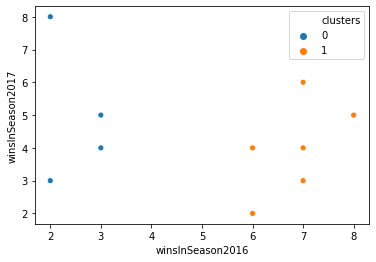

In [535]:
scatterandclusters(datapoints,data_df,[[4,6],[5,4]])


### Quesiton 1.2

Iternation: 1
Previous SSE: None
Current SSE: 57
Iternation: 2
Previous SSE: 57
Current SSE: 43.96875
Iternation: 3
Previous SSE: 43.96875
Current SSE: 27.833333333333332
 
No of Iternation: 3
Sum of Square Error: 27.833333333333332 


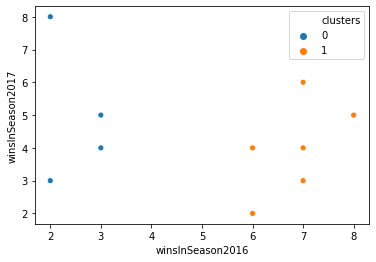

In [536]:
scatterandclusters(datapoints,data_df, [[4,6], [5,4]], metrics=0)

### Question 1.3

Iternation: 1
Previous SSE: None
Current SSE: 59
Iternation: 2
Previous SSE: 59
Current SSE: 29.0
 
No of Iternation: 2
Sum of Square Error: 29.0 


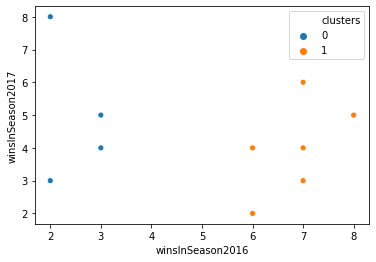

In [537]:
scatterandclusters(datapoints,data_df,[[3,3],[8,3]])

### Question 1.4

Iternation: 1
Previous SSE: None
Current SSE: 116
Iternation: 2
Previous SSE: 116
Current SSE: 74.0
 
No of Iternation: 2
Sum of Square Error: 74.0 


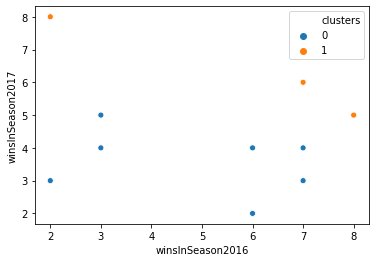

In [538]:
scatterandclusters(datapoints,data_df,[[3,2],[4,8]])

Observations:
When using the Euclidean the local maxima leads to the same centriods even with different 
initial configuation as given above.
With Manhattan distance dosn't try to find the best maxima when compared with euclidean distance which can be ovebse in 1.3 and 1.4 repectively 


### Question 2

In [551]:
from sklearn.datasets import load_iris
datasetiris=load_iris()
datasetiris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [540]:
datasetiris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [541]:
#### Euclidean Distance

e_clusters=kmeans(None,datasetiris.data,k=3,metric=0)


Iternation: 1
Previous SSE: None
Current SSE: 162.21
Iternation: 2
Previous SSE: 162.21
Current SSE: 91.74345963435378
Iternation: 3
Previous SSE: 91.74345963435378
Current SSE: 83.02104835746147
Iternation: 4
Previous SSE: 83.02104835746147
Current SSE: 79.61572102298426
Iternation: 5
Previous SSE: 79.61572102298426
Current SSE: 79.01204896074461
Iternation: 6
Previous SSE: 79.01204896074461
Current SSE: 78.85144142614601
 
No of Iternation: 6
Sum of Square Error: 78.85144142614601 


In [542]:
### Consine Similarity

c_cluster=kmeans(None,datasetiris.data,k=3,metric=1)


Iternation: 1
Previous SSE: None
Current SSE: 252.45000000000007
Iternation: 2
Previous SSE: 252.45000000000007
Current SSE: 109.36686658944242
Iternation: 3
Previous SSE: 109.36686658944242
Current SSE: 101.13367336186019
Iternation: 4
Previous SSE: 101.13367336186019
Current SSE: 92.93030809618764
Iternation: 5
Previous SSE: 92.93030809618764
Current SSE: 91.98930917874395
 
No of Iternation: 5
Sum of Square Error: 91.98930917874395 


In [543]:
### Jaccard Similarity

j_cluster=kmeans(None,datasetiris.data,k=3,metric=2)


Iternation: 1
Previous SSE: None
Current SSE: 166.01
Iternation: 2
Previous SSE: 166.01
Current SSE: 86.32123489331185
Iternation: 3
Previous SSE: 86.32123489331185
Current SSE: 79.39432885317473
Iternation: 4
Previous SSE: 79.39432885317473
Current SSE: 79.16344154984179
Iternation: 5
Previous SSE: 79.16344154984179
Current SSE: 79.09734974533107
 
No of Iternation: 5
Sum of Square Error: 79.09734974533107 


### Question 2.1

When we compare the SSE we get the Euclidean distance as the best compared to other distance metrics. As it has SSE lower than 100 in most iteration. 

### Question 2.2

In [544]:
def predictscore(listofcluster,y,k=3):
    
    labels=[]
    ids=[]
    
    for i in range(k):
        ids.append(np.where(cluster==i))
    
    
    for c in ids:
        modeofdata = int(stats.mode(y[c])[0])
        listofcluster[c]=modeofdata
    
    return listofcluster


for cluster,method in zip ((e_clusters,c_cluster,j_cluster),('Euclidean','Cosine','Jaccard')):
    accuracy=accuracy_score(datasetiris.target,predictscore(cluster,datasetiris.target))
    print("accuracy for {} distance metric: {:.2f}".format(method,accuracy))

accuracy for Euclidean distance metric: 0.89
accuracy for Cosine distance metric: 0.97
accuracy for Jaccard distance metric: 0.88


From the above we can conclude that consine similarity is metrics is better compared to other as it has the highest accuracy of all. This is due to consine similarity work well in muti-dimensions as it considers the angle between the two vector so even if the distance between two points is high the angle might be low which plays a crucial role while forming the clusters. 

### Question 2.3


Euclidean-k means requries more iteration compared Jaccard and Cosine. As it calcuate distance between centriod and other datapoints it forms small cluster which result in more iteration in euclidean distance. Also euclidean distance works worst with outliers dataset.

In [545]:
#Q2.4
##### when there is no change in centriod position.
##### when the maximum preset value (100) of iteration is complete 
##### when the SSE value increases in the next iteration
e_clusters=kmeans([[7.1,3.8,5.7,2.2],
 [5.7,3.8,1.7,0.3],
 [7.7,2.6,6.9,2.3]],datasetiris.data,k=3,metric=0)

Iternation: 1
Previous SSE: None
Current SSE: 379.1
Iternation: 2
Previous SSE: 379.1
Current SSE: 118.63605287711948
Iternation: 3
Previous SSE: 118.63605287711948
Current SSE: 97.50886925177161
Iternation: 4
Previous SSE: 97.50886925177161
Current SSE: 86.29439304485368
Iternation: 5
Previous SSE: 86.29439304485368
Current SSE: 79.86398439527466
Iternation: 6
Previous SSE: 79.86398439527466
Current SSE: 79.19714263977782
Iternation: 7
Previous SSE: 79.19714263977782
Current SSE: 78.85144142614601
 
No of Iternation: 7
Sum of Square Error: 78.85144142614601 


In [546]:
j_cluster=kmeans([[7.1,3.8,5.7,2.2],
 [5.7,3.8,1.7,0.3],
 [7.7,2.6,6.9,2.3]],datasetiris.data,k=3,metric=2)

Iternation: 1
Previous SSE: None
Current SSE: 381.9000000000001
Iternation: 2
Previous SSE: 381.9000000000001
Current SSE: 114.84182240377156
Iternation: 3
Previous SSE: 114.84182240377156
Current SSE: 89.91254802419698
Iternation: 4
Previous SSE: 89.91254802419698
Current SSE: 79.92708472777898
Iternation: 5
Previous SSE: 79.92708472777898
Current SSE: 79.16344154984179
Iternation: 6
Previous SSE: 79.16344154984179
Current SSE: 79.09734974533107
 
No of Iternation: 6
Sum of Square Error: 79.09734974533107 


In [547]:
c_cluster=kmeans([[7.1,3.8,5.7,2.2],
 [5.7,3.8,1.7,0.3],
 [7.7,2.6,6.9,2.3]],datasetiris.data,k=3,metric=1)

Iternation: 1
Previous SSE: None
Current SSE: 457.8
Iternation: 2
Previous SSE: 457.8
Current SSE: 129.517346492178
Iternation: 3
Previous SSE: 129.517346492178
Current SSE: 107.35772139943839
Iternation: 4
Previous SSE: 107.35772139943839
Current SSE: 98.07865137459942
Iternation: 5
Previous SSE: 98.07865137459942
Current SSE: 92.22181104125576
Iternation: 6
Previous SSE: 92.22181104125576
Current SSE: 91.98930917874395
 
No of Iternation: 6
Sum of Square Error: 91.98930917874395 


### Question 2.4


From the above configuration as mentioned in problem statment, when we keep same centriod we get the above results.In which Euclidean distance takes most number of iteration while it has Least value of SSE. It takes more time and more time to create above result as in Euclidean-kmeans takes create small cluster. Also it's performance is worst when we deal with outliers dataset. 

### Question 3

(Kmeans general idea)

Kmeans is an unsupervised learning method which can be used with unlabelled dataset.K-means tries to group item based on their property. The properties should be quantifiable i.e should be expressed in number as distance metrics. It has centroid in each cluster which represents the center of the cluster. A data point is assigned a cluster based on the proximity to the nearest centroid. This process continues until the cluster starts overlapping each other. K-means tends to work fast for small values of K.

K-mean fails when clusters have an uneven number of points. Also, it fails to work with non-spherical clusters.

K-means is simple to implement and is faster than hierarchical clustering when the value of k is small. K-means is cost-effective(computationally). Performs well when the clusters are spherical. 

K-means fails when the value of K is not ideal for the dataset, Also when there are clusters of varying size and density. K-mean struggles when the number of dimensions increases in the dataset and K-means only works with numerical data so preprocessing of data is necessary 

It is hard to predict the correct value of no clusters and initially, values may sway the results in any direction. This could be overcome by visually selecting good centroids rather than having a randomly assigned initial centroid. There are few ways like the Elbow method, the Silhouette method, etc.

    


https://github.com/rpm360/MLassignment/blob/master/HW6/hwcode.ipynb
